In [355]:
#Loading the basic required libraries additional required can be loaded later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = "C:/Users/Aditya/Downloads/Stock_Market_Index.csv"
df = pd.read_csv(data)
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [356]:
#Converting all the data to USD
def convert_to_usd(df):
    # Mapping dictionary for currency conversion based on Index
    index_currency_mapping = {
        'NYA': 'USD',   # United States
        'IXIC': 'USD',  # United States
        'HSI': 'HKD',   # Hong Kong
        '000001.SS': 'CNY',  # China
        'N225': 'JPY',  # Japan
        'N100': 'EUR',  # Europe
        '399001.SZ': 'CNY',  # China
        'GSPTSE': 'CAD',  # Canada
        'NSEI': 'INR',  # India
        'GDAXI': 'EUR',  # Germany
        'KS11': 'KRW',  # Korea
        'SSMI': 'CHF',  # Switzerland
        'TWII': 'TWD',  # Taiwan
        'J203.JO': 'ZAR'  # South Africa
    }

    # Check if the 'Index' is in the mapping
    if 'Index' in df.columns:
        # Convert only relevant columns to USD
        columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close']

        # Include 'Index' and 'Currency' columns in conversion
        df['Currency'] = df['Index'].map(index_currency_mapping)

        # Define conversion rates
        conversion_rates = {
            'USD': 1,
            'HKD': 0.13,
            'CNY': 0.15,
            'JPY': 0.0091,
            'EUR': 1.18,
            'CAD': 0.78,
            'INR': 0.014,
            'KRW': 0.00089,
            'CHF': 1.08,
            'TWD': 0.036,
            'ZAR': 0.068
        }

        # Convert to USD using manual rates and drop original columns
        for col in columns_to_convert:
            new_col = col + '_USD'
            df[new_col] = np.where(df['Currency'] == 'USD', df[col], df[col] * df['Currency'].map(conversion_rates))
        
        # Drop original columns
        df = df.drop(columns=columns_to_convert)

        # Reorder columns to match the original order and remove duplicate 'CloseUSD' column
        df = df[['Index', 'Date', 'Open_USD', 'High_USD', 'Low_USD', 'Close_USD', 'Adj Close_USD', 'Volume']]

        return df
    else:
        print("The dataset does not contain the 'Index' column.")

df = convert_to_usd(df)
df.head()

,Index,Date,Open_USD,High_USD,Low_USD,Close_USD,Adj Close_USD,Volume
0,HSI,1986-12-31,333.879006,333.879006,333.879006,333.879006,333.879006,0.0
1,HSI,1987-01-02,330.213013,330.213013,330.213013,330.213013,330.213013,0.0
2,HSI,1987-01-05,331.811987,331.811987,331.811987,331.811987,331.811987,0.0
3,HSI,1987-01-06,335.906987,335.906987,335.906987,335.906987,335.906987,0.0
4,HSI,1987-01-07,338.923013,338.923013,338.923013,338.923013,338.923013,0.0


In [357]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Index          104224 non-null  object        
 1   Date           104224 non-null  datetime64[ns]
 2   Open_USD       104224 non-null  float64       
 3   High_USD       104224 non-null  float64       
 4   Low_USD        104224 non-null  float64       
 5   Close_USD      104224 non-null  float64       
 6   Adj Close_USD  104224 non-null  float64       
 7   Volume         104224 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.4+ MB


In [358]:
summary = df.describe()
summary

,Open_USD,High_USD,Low_USD,Close_USD,Adj Close_USD,Volume
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05
mean,2960.596761,2977.170691,2942.233992,2960.454924,2960.298163,1.347646e+09
std,3632.927103,3652.431313,3611.113209,3632.625371,3632.654662,4.427662e+09
min,9.286459,9.286459,9.286459,9.286459,9.286459,0.000000e+00
25%,296.240941,297.700012,294.464951,296.034636,296.034636,0.000000e+00
50%,1333.459351,1344.932036,1322.234165,1334.319338,1334.319338,9.529000e+05
75%,4304.515558,4334.127319,4272.334839,4307.715088,4307.715088,2.064676e+08
max,18346.982247,18370.947540,18248.806011,18313.576955,18313.576955,9.440374e+10


In [359]:
# Display summary statistics for trading volume
volume_stats = df.groupby('Index')['Volume'].describe().T

volume_stats

Index,000001.SS,399001.SZ,GDAXI,GSPTSE,HSI,IXIC,J203.JO,N100,N225,NSEI,NYA,SSMI,TWII
count,5.791000e+03,5.760000e+03,8.438000e+03,1.052600e+04,8.492000e+03,1.269000e+04,2346.0,5.474000e+03,1.387400e+04,3.346000e+03,1.394700e+04,7.671000e+03,5.869000e+03
mean,1.065404e+05,2.500271e+05,6.830384e+07,9.620499e+09,8.430191e+08,9.915283e+08,0.0,1.958226e+08,3.976289e+07,1.830719e+05,1.215565e+09,3.646631e+07,2.457311e+06
std,1.776426e+05,4.937473e+05,6.475934e+07,1.043927e+10,1.027671e+09,1.113646e+09,0.0,1.655459e+08,6.376717e+07,2.243330e+05,1.834155e+09,3.656943e+07,1.919961e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+03,0.000000e+00,0.000000e+00,2.379250e+07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.449700e+06
50%,7.720000e+04,6.610000e+04,7.312590e+07,7.328095e+09,2.791826e+08,4.926800e+08,0.0,2.049432e+08,0.000000e+00,1.453000e+05,0.000000e+00,4.003240e+07,2.300800e+06
75%,1.535500e+05,1.270250e+05,1.068676e+08,1.798100e+10,1.596115e+09,1.845638e+09,0.0,2.915412e+08,7.930000e+07,2.393750e+05,2.681975e+09,5.785615e+07,3.491000e+06
max,1.006520e+07,3.635400e+06,5.101956e+08,9.440374e+10,9.799120e+09,1.110216e+10,0.0,1.159639e+09,5.952000e+08,1.811000e+06,1.145623e+10,3.467677e+08,1.499950e+07


In [360]:
# Calculate daily price volatility by subtracting low prices from high prices
df['Daily_Volatility'] = df['High_USD'] - df['Low_USD']

# Display summary statistics for daily price volatility
volatility_stats = df.groupby('Index')['Daily_Volatility'].describe().T
volatility_stats


Index,000001.SS,399001.SZ,GDAXI,GSPTSE,HSI,IXIC,J203.JO,N100,N225,NSEI,NYA,SSMI,TWII
count,5791.000000,5760.000000,8438.000000,10526.000000,8492.000000,12690.000000,2346.000000,5474.000000,13874.000000,3346.000000,13947.000000,7671.000000,5869.000000
mean,6.476206,25.631243,102.920405,62.195493,27.635136,28.065739,42.872897,11.366969,1.283628,1.493039,34.541537,85.168259,3.659058
std,6.092044,24.327942,94.120193,71.701558,22.893321,48.376759,27.039608,7.920729,1.652721,1.090632,68.662841,66.433398,2.404756
min,0.145496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334793
25%,2.933469,9.572607,31.653371,13.805771,12.558013,0.000000,26.236113,6.445761,0.000000,0.874477,0.000000,44.172421,2.149559
50%,4.525195,18.119275,88.995507,40.637886,23.089345,10.404999,36.550797,9.864783,0.940437,1.225708,0.000000,70.739997,3.036252
75%,7.470667,32.506860,147.863276,85.936158,37.454346,36.450134,52.499453,14.537609,1.995814,1.777653,54.084471,107.675684,4.402441
max,64.813403,244.333447,1086.851444,1332.161544,267.872744,656.840332,366.743657,85.231376,38.277328,22.459500,1292.750001,1452.611074,49.945008


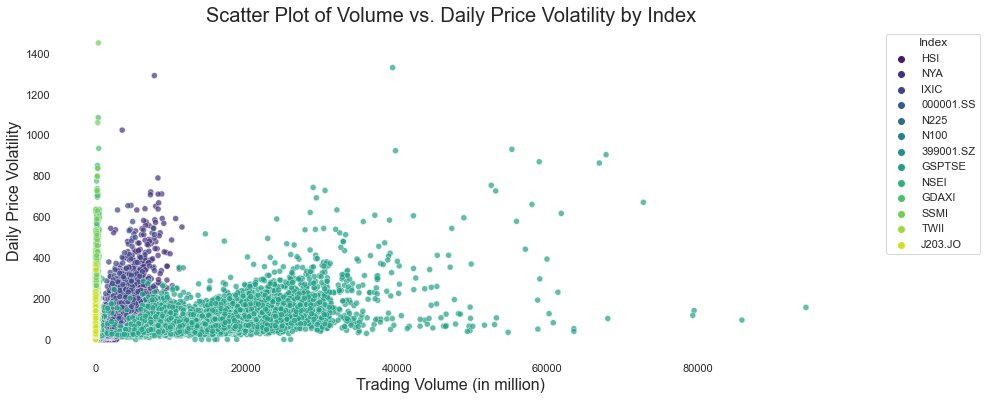

In [361]:
from matplotlib.ticker import FuncFormatter

# Set the style of seaborn
sns.set(style="white")
# Calculate the correlation coefficient for each index
correlation_df = df.groupby('Index')[['Volume', 'Daily_Volatility']].corr().iloc[0::2,-1].reset_index()

# Visualize the correlation using scatter plots
plt.figure(figsize=(14, 6))

# Scatter Plot
sns.scatterplot(x='Volume', y='Daily_Volatility', data=df, hue='Index', palette='viridis',alpha=0.7, edgecolor='w')

# Format x-axis tick labels to represent trading volume in thousands
def format_volume_ticks(x, _):
    return '{:.0f}'.format(x / 1000000)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_volume_ticks))

plt.title('Scatter Plot of Volume vs. Daily Price Volatility by Index', fontsize = 20)
plt.xlabel('Trading Volume (in million)', fontsize = 16)
plt.ylabel('Daily Price Volatility',fontsize = 16)
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left = True, bottom = True)
plt.show()


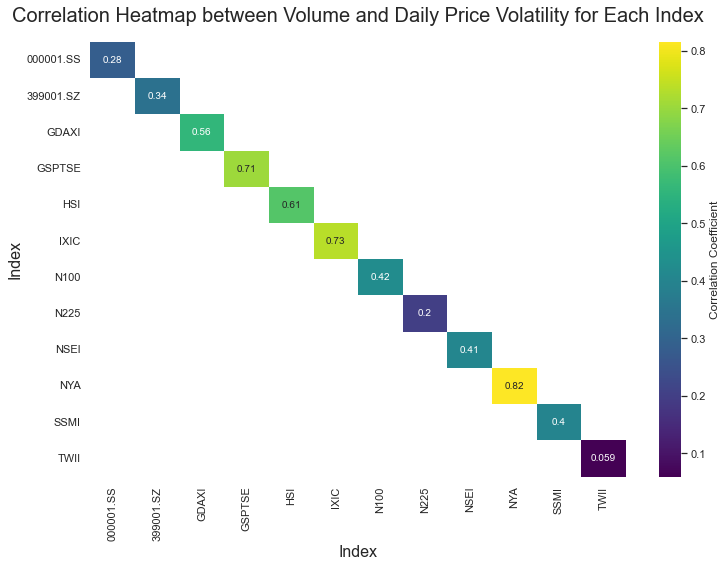

In [383]:
# Correlation Heatmap of Volume vs Daily Price Volatility
sns.set(style="white")
plt.figure(figsize=(12, 8))  # Increase the size of the heatmap

correlation_matrix = pd.pivot_table(correlation_df, values='Daily_Volatility', index='Index', columns='Index')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0, cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 10})
plt.title('Correlation Heatmap between Volume and Daily Price Volatility for Each Index', fontsize=20, pad =20)  # Increase title font size
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Index', fontsize = 16)
sns.despine(left = True, bottom = True)
plt.show()


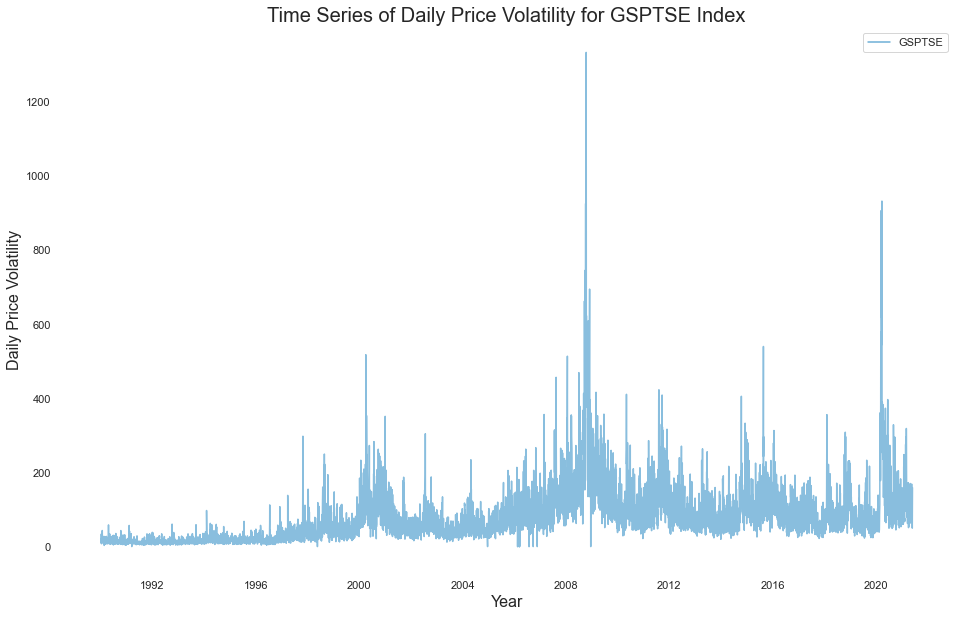

In [345]:
# Set the start date to 1980
start_date = '1990-01-01'
df1 = df[df['Date'] >= start_date]

# Sort the DataFrame by 'Date'
df1 = df1.sort_values('Date')

# Select specific indices for plotting
selected_indices = ['GSPTSE']
df1 = df1[df1['Index'].isin(selected_indices)]

# Create a 'Year' column
df1['Year'] = df1['Date'].dt.to_period('Y').astype(str)

# Plotting
plt.figure(figsize=(16, 10))
sns.set(style="white")
sns.lineplot(x='Date', y='Daily_Volatility', hue='Index', data=df1, palette='Blues_r', alpha=0.8, ci=None)

plt.title('Time Series of Daily Price Volatility for GSPTSE Index', fontsize=20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Daily Price Volatility', fontsize = 16)
plt.legend()
sns.despine(left=True, bottom = True)
plt.show()


In [367]:
df['Daily_Volatility'].max()

1452.6110743200006

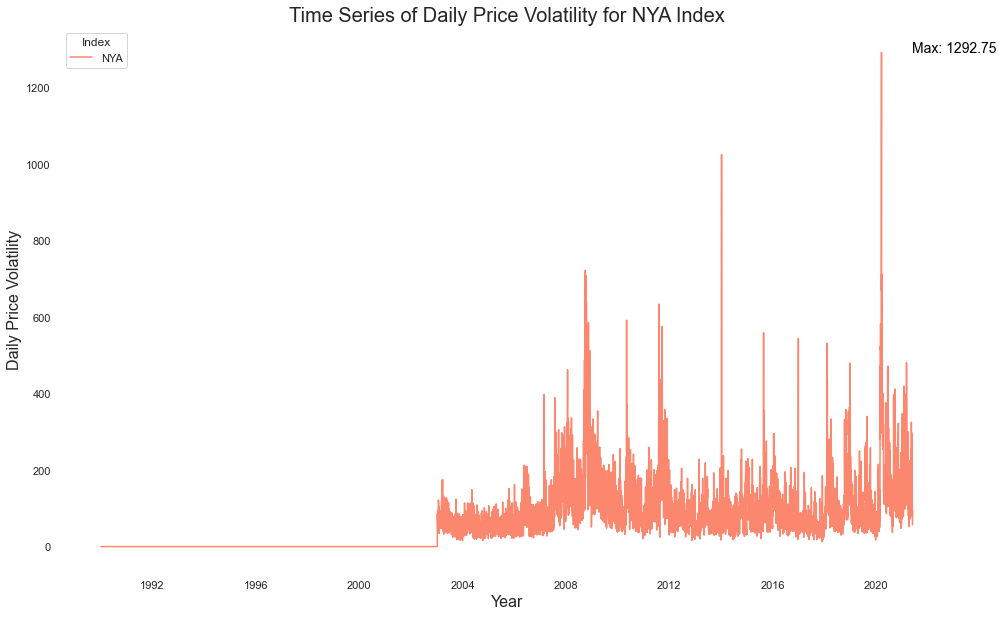

In [380]:
# Set the start date to 1990
start_date = '1990-01-01'
df1 = df[df['Date'] >= start_date]

# Sort the DataFrame by 'Date'
df1 = df1.sort_values('Date')

# Select specific indices for plotting
selected_indices = ['NYA']
df1 = df1[df1['Index'].isin(selected_indices)]

# Create a 'Year' column
df1['Year'] = df1['Date'].dt.to_period('Y').astype(str)

# Plotting
plt.figure(figsize=(16, 10))
sns.set(style="white")

# Plot the daily volatility for each index
sns.lineplot(x='Date', y='Daily_Volatility', hue='Index', data=df1, palette='Reds', alpha=0.8, ci=None)

# Add a second legend for the maximum daily volatility
max_volatility = df1.groupby('Index')['Daily_Volatility'].max()
for index, max_value in max_volatility.items():
    plt.text(df1[df1['Index'] == index]['Date'].max(), max_value, f'Max: {max_value:.2f}', color='black', fontsize=14)

plt.title('Time Series of Daily Price Volatility for NYA Index', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Daily Price Volatility', fontsize=16)

# Remove the default legend and set a custom legend
plt.legend().set_visible(False)
plt.legend(title='Index', loc='upper left', labels=selected_indices)

sns.despine(left=True, bottom=True)
plt.show()


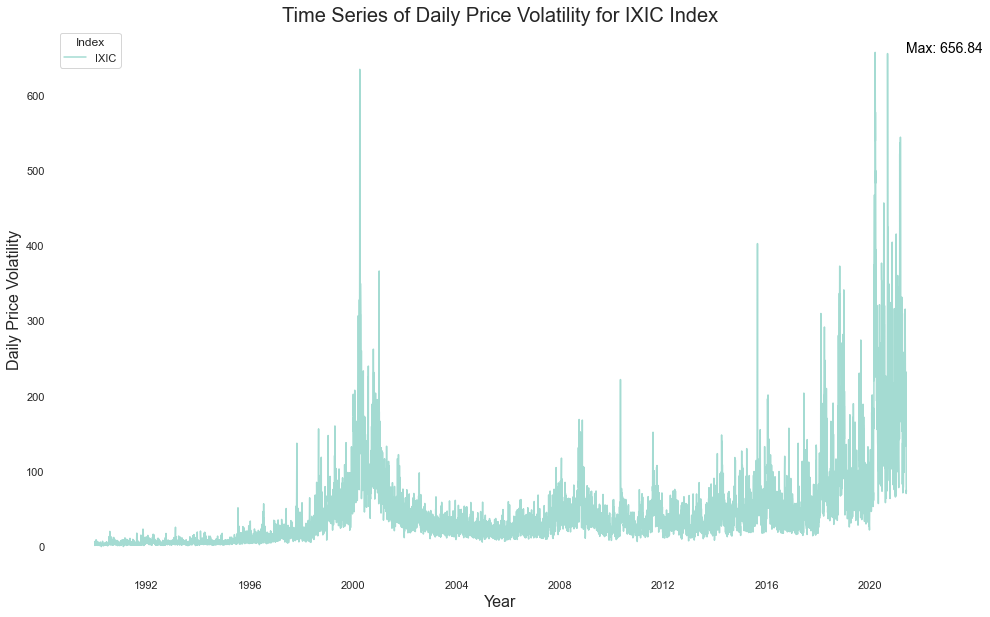

In [381]:
# Set the start date to 1990
start_date = '1990-01-01'
df1 = df[df['Date'] >= start_date]

# Sort the DataFrame by 'Date'
df1 = df1.sort_values('Date')

# Select specific indices for plotting
selected_indices = ['IXIC']
df1 = df1[df1['Index'].isin(selected_indices)]

# Create a 'Year' column
df1['Year'] = df1['Date'].dt.to_period('Y').astype(str)

# Plotting
plt.figure(figsize=(16, 10))
sns.set(style="white")

# Plot the daily volatility for each index
sns.lineplot(x='Date', y='Daily_Volatility', hue='Index', data=df1, palette='Set3', alpha=0.8, ci=None)

# Add a second legend for the maximum daily volatility
max_volatility = df1.groupby('Index')['Daily_Volatility'].max()
for index, max_value in max_volatility.items():
    plt.text(df1[df1['Index'] == index]['Date'].max(), max_value, f'Max: {max_value:.2f}', color='black', fontsize=14)

plt.title('Time Series of Daily Price Volatility for IXIC Index', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Daily Price Volatility', fontsize=16)

# Remove the default legend and set a custom legend
plt.legend().set_visible(False)
plt.legend(title='Index', loc='upper left', labels=selected_indices)

sns.despine(left=True, bottom=True)
plt.show()


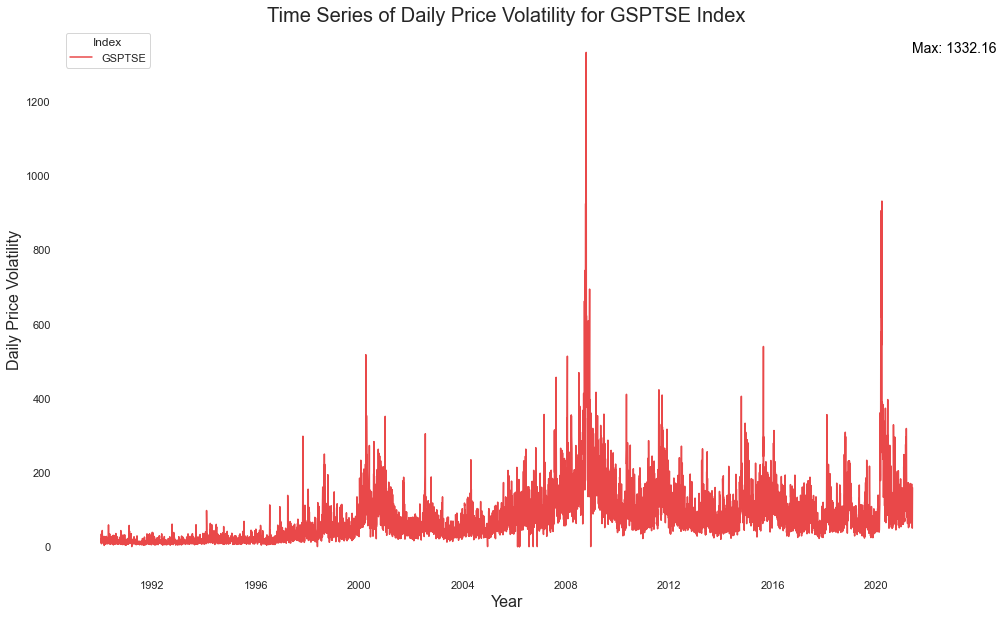

In [382]:
# Set start date
start_date = '1990-01-01'

# Filter DataFrame based on start_date
df1 = df[df['Date'] >= start_date]

# Sort the DataFrame by 'Date'
df1 = df1.sort_values('Date')

# Select specific indices for plotting
selected_indices = ['GSPTSE']
df1 = df1[df1['Index'].isin(selected_indices)]

# Create a 'Year' column
df1['Year'] = df1['Date'].dt.to_period('Y').astype(str)

# Plotting
plt.figure(figsize=(16, 10))
sns.set(style="white")

# Plot the daily volatility for each index
sns.lineplot(x='Date', y='Daily_Volatility', hue='Index', data=df1, palette='Set1', alpha=0.8, ci=None)

# Add a second legend for the maximum daily volatility
max_volatility = df1.groupby('Index')['Daily_Volatility'].max()
for index, max_value in max_volatility.items():
    plt.text(df1[df1['Index'] == index]['Date'].max(), max_value, f'Max: {max_value:.2f}', color='black', fontsize=14)

plt.title('Time Series of Daily Price Volatility for GSPTSE Index', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Daily Price Volatility', fontsize=16)

# Remove the default legend and set a custom legend
plt.legend().set_visible(False)
plt.legend(title='Index', loc='upper left', labels=selected_indices)

sns.despine(left=True, bottom=True)
plt.show()
